# German Credit Risk Data has been analyzed and modeled.

Step 1: Importing Necessary Libraries and Data

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

%matplotlib inline

gd = pd.read_csv('german_credit_data.csv',index_col=0)
gd.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Step 2: Analyzing Data

In [2]:
gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [4]:
gd.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


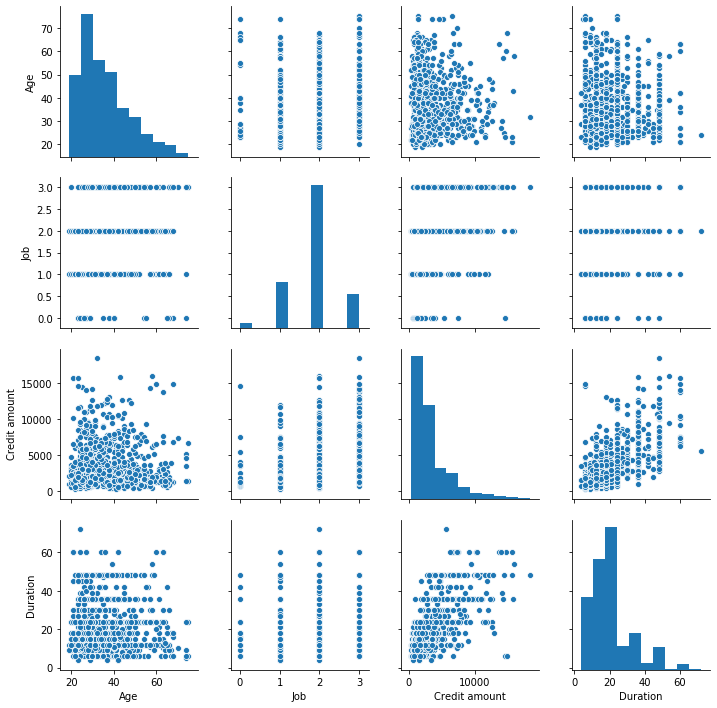

In [4]:
sns.pairplot(gd)

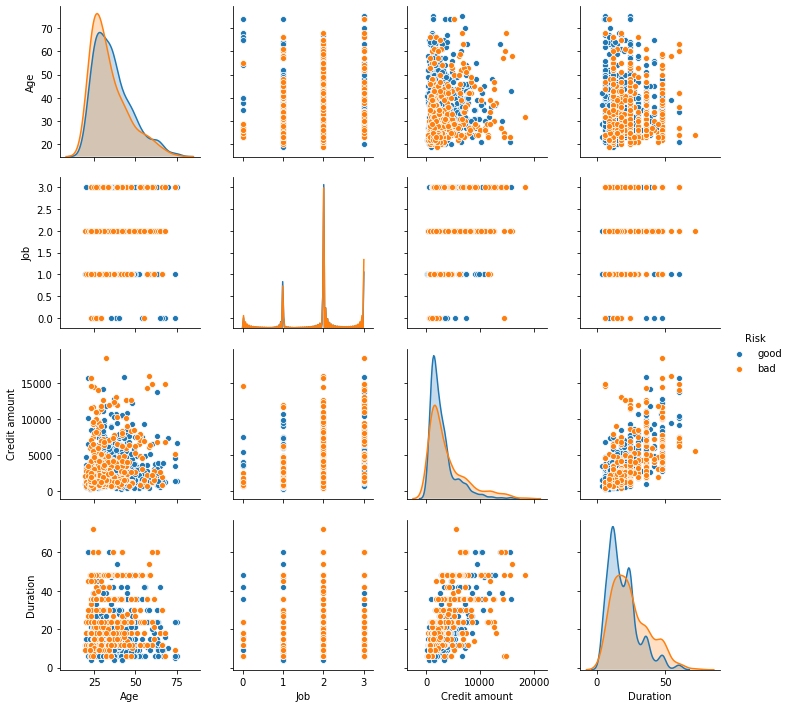

In [5]:
sns.pairplot(gd,hue='Risk')

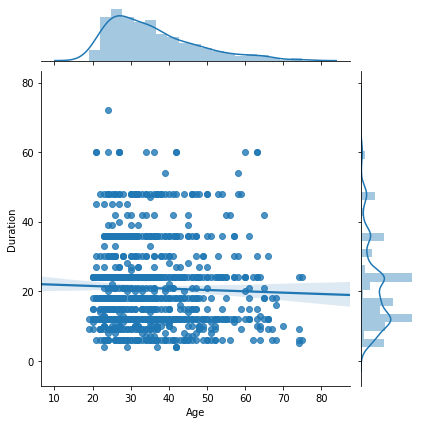

In [6]:
sns.jointplot(x='Age',y='Duration',data=gd,kind='reg')

Step3: Creating Dummy Variables

In [3]:
categorical_variable=gd.describe(include=['O'])

In [4]:
categorical_variable_col = set(categorical_variable.columns) 

In [5]:
gd_dummy=pd.get_dummies(gd, columns=categorical_variable_col)

In [8]:
gd_dummy.head(5)

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Risk_bad,Risk_good,Saving accounts_little,Saving accounts_moderate,...,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Checking account_little,Checking account_moderate,Checking account_rich,Housing_free,Housing_own,Housing_rent
0,67,2,1169,6,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,22,2,5951,48,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,49,1,2096,12,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,45,2,7882,42,0,1,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
4,53,2,4870,24,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [18]:
gd['Sex'].value_counts()

male      690
female    310
Name: Sex, dtype: int64

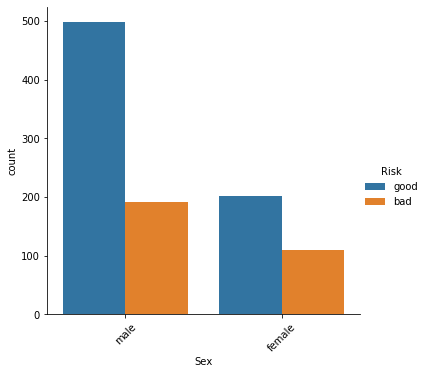

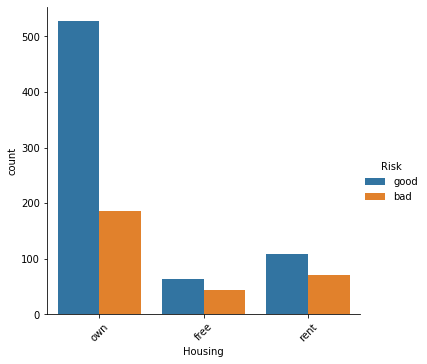

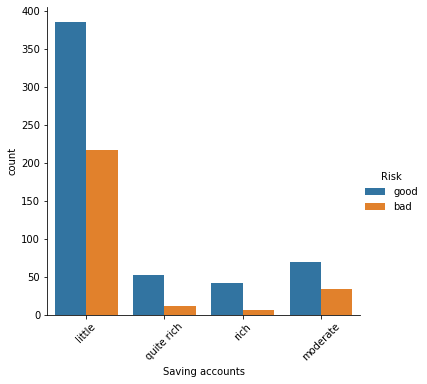

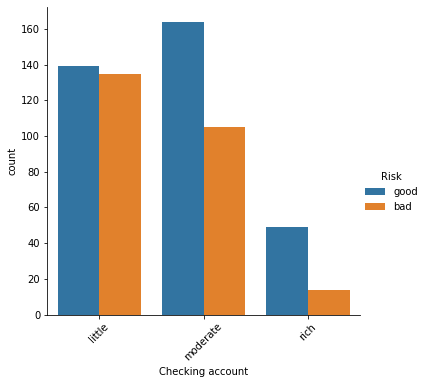

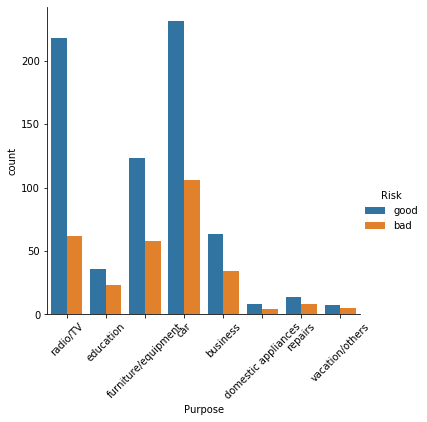

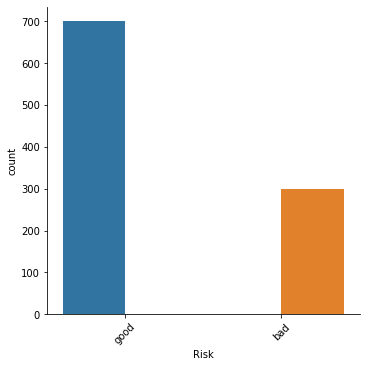

In [50]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in gd.columns:
     if gd[col].dtype == "object":
        cols_list.append(col)
        
# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Risk', kind='count', data=gd)
    plt.xticks(rotation=45)

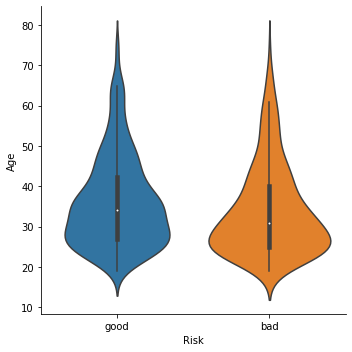

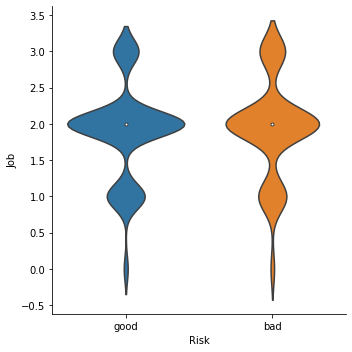

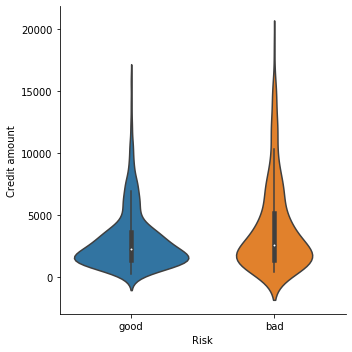

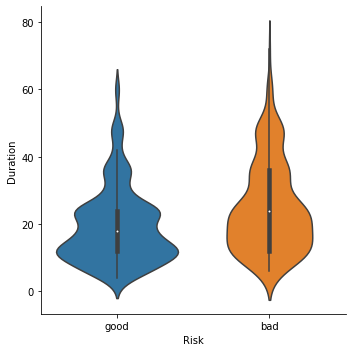

In [9]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in gd.columns:
     if gd[col].dtype == "int64":
        cols_list.append(col)
        
# looking at values in these columns
for l in cols_list:
     #sns.jointplot(x=l,y='Duration',data=gd,kind='reg')
        #sns.distplot(Ser)
   sns.catplot(x="Risk", y=l,
            kind="violin", data=gd); 

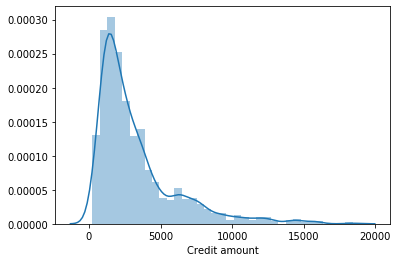

In [44]:
 sns.distplot(gd['Credit amount'])

Step 4: Train Test Split

Let's split  the data into a training set and a test set!


In [6]:
X = gd_dummy.drop({'Risk_bad','Risk_good'},axis=1)
y = gd_dummy['Risk_bad']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Modeling

Step 5: Model 1, Decision Tree

In [8]:
dtree = DecisionTreeClassifier(max_leaf_nodes=5)

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
tree_predictions_test = dtree.predict(X_test)
tree_predictions_train = dtree.predict(X_train)

In [11]:
print(classification_report(y_test,tree_predictions_test))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       206
           1       0.55      0.63      0.59        94

    accuracy                           0.72       300
   macro avg       0.69      0.70      0.69       300
weighted avg       0.73      0.72      0.73       300



In [20]:
r_a_score = roc_auc_score(y_test, tree_predictions_test)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6973249328651104


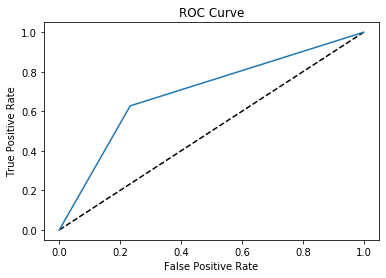

In [31]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, tree_predictions_test)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() 
 


In [12]:
print(classification_report(y_train,tree_predictions_train))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       494
           1       0.53      0.64      0.58       206

    accuracy                           0.72       700
   macro avg       0.68      0.70      0.69       700
weighted avg       0.74      0.72      0.73       700



In [19]:
r_a_score = roc_auc_score(y_train, tree_predictions_train)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6999430053850084


Step 6: Model 2, Random Forests

Now let's compare the decision tree model to a random forest.


In [22]:
rfc = RandomForestClassifier(max_leaf_nodes=20)
rfc.fit(X_train, y_train)

C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
rfc_predictions_test = rfc.predict(X_test)
rfc_predictions_train = rfc.predict(X_train)

In [24]:
print(confusion_matrix(y_test,rfc_predictions_test))

[[202   4]
 [ 82  12]]


In [26]:
print(classification_report(y_test,rfc_predictions_test))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       206
           1       0.75      0.13      0.22        94

    accuracy                           0.71       300
   macro avg       0.73      0.55      0.52       300
weighted avg       0.72      0.71      0.63       300



In [27]:
r_a_score = roc_auc_score(y_test, rfc_predictions_test)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.5541210493699649


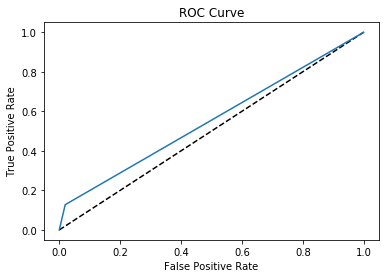

In [33]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, rfc_predictions_test)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() 

In [28]:
print(classification_report(y_train,rfc_predictions_train))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86       494
           1       0.92      0.28      0.43       206

    accuracy                           0.78       700
   macro avg       0.84      0.63      0.64       700
weighted avg       0.81      0.78      0.73       700



In [29]:
r_a_score = roc_auc_score(y_train, rfc_predictions_train)
print("ROC-AUC-Score:", r_a_score)


ROC-AUC-Score: 0.6332887858181675


Step 7: Model 3, Logistic Regression

In [26]:

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train) 

C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
log_predictions_test = logmodel.predict(X_test)
log_predictions_train = logmodel.predict(X_train)

In [12]:
print(confusion_matrix(y_test,log_predictions_test))

[[186  20]
 [ 64  30]]


In [13]:
print(confusion_matrix(y_train,log_predictions_train))

[[448  46]
 [128  78]]


In [14]:
print(classification_report(y_test,log_predictions_test))

              precision    recall  f1-score   support

           0       0.74      0.90      0.82       206
           1       0.60      0.32      0.42        94

    accuracy                           0.72       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.72      0.69       300



In [15]:
print(classification_report(y_train,log_predictions_train))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       494
           1       0.63      0.38      0.47       206

    accuracy                           0.75       700
   macro avg       0.70      0.64      0.66       700
weighted avg       0.73      0.75      0.73       700



In [16]:
r_a_score = roc_auc_score(y_test, log_predictions_test)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.611030778764718


In [17]:
r_a_score = roc_auc_score(y_train, log_predictions_train)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.6427616838960734


In [28]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6
                                       Results: Logit
Model:                         Logit                      Pseudo R-squared:           inf   
Dependent Variable:            Risk_bad                   AIC:                        inf   
Date:                          2020-02-20 19:55           BIC:                        inf   
No. Observations:              700                        Log-Likelihood:             -inf  
Df Model:                      21                         LL-Null:                    0.0000
Df Residuals:                  678                        LLR p-value:                1.0000
Converged:                     1.0000                     Scale:                      1.0000
No. Iterations:                6.0000                                                       
--------------------------------------------------------------------------------------------
            

C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\U075291\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (

In [30]:
logmodel.predict_proba(X_train)

array([[0.9200155 , 0.0799845 ],
       [0.5663464 , 0.4336536 ],
       [0.6621299 , 0.3378701 ],
       ...,
       [0.40030584, 0.59969416],
       [0.91257404, 0.08742596],
       [0.64593422, 0.35406578]])